# Algoritmo de Gradiente Descendente

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para el método de Gradiente Descendente.

# Preliminares matemáticos

## Gradiente Descendente (GD)

El gradiente de una función $f$ se puede representar como un vector de $n$-componentes

\begin{equation}
 \underset{n\times 1}{\nabla f} =
 \begin{bmatrix}
  \partial f/\partial x_{1} \\
  \partial f/\partial x_{2} \\
  \partial f/\partial x_{3} \\
  \vdots \\
  \partial f/\partial x_{n} \\
 \end{bmatrix}.
\end{equation}

La dirección del gradiente suele conocerce como **durección de ascenso inclinado** y permite movernos desde cualquier punto en un espacio $n$-dimensional. Aquí, un valor negativo del gradiente representa la dirección de mayor descenso. Por consiguiente, cualquier méodo que haga uso del vector gradiente debe llegar más rápido al mínimo de la función que uno que no utilice el vector gradiente.

**Teorema 1.** *El vector de gradiente representa la dirección del ascenso más inclinado.*

La evaluación del gradiente requiere el cálculo de las derivadas parciales $\partial f/\partial x_{i}, i=1,2,3,\dots,n$. Sin embargo, GD suele presentar los siguientes problemas:

1. El cálculo de las componentes del gradiente a veces es imposible aún cuando la función es derivable en todos los puntos.
2. El cálculo de las derivadas parciales $\partial f/\partial x_{i}$ suelen requerir de demasiado costo computacional.
3. El gradiente $\nabla f$ no está definido en todos los puntos.

Una forma de obtener una aproximación a la derivada parcial $\partial f/\partial x_{i}$ en $x_{m}$ es utilizando el método de diferencias finitas

\begin{equation}
 \label{eqn:mdf}
 \left. \frac{\partial f}{\partial x_{i}} \right|_{x_{m}} \simeq \frac{f\left(x_{m} + \left(\Delta x_{i}\right)u_{i}\right) - f\left( x_{m}\right)}{\left(\Delta x_{i}\right)}, \quad i=1,2,3,\dots,n.
\end{equation}

Si el valor de la función en el punto $x_{m}$ es conocido, la Ec. \eqref{eqn:mdf} requiere de una evaluación adicional para encontrar $(\partial f/\partial x_{i})|x_{m}$. Es decir, se requiere de $n$ evaluaciones para encontrar una aproximación al gradiente $\nabla f|x_{m}$. Por esta razón, se suele utilizar el método de diferencias centrales para encontrar una mejor aproximación a la derivada parcial $\partial f/\partial x_{i}$ en $x_{m}$

\begin{equation}
 \label{eqn:mdc}
 \left. \frac{\partial f}{\partial x_{i}} \right|_{x_{m}} \simeq \frac{f\left(x_{m} + \left(\Delta x_{t}\right)u_{i}\right) - f\left( x_{m} - \left(\Delta x_{i}\right)u_{i} \right)}{2\left(\Delta x_{i}\right)}, \quad i=1,2,3,\dots,n.
\end{equation}

donde $\left(\Delta x_{i}\right)$ es una cantidad escalar pequeña, $u_{i}$ un vector de orden $n$ cuyo $i$-ésimo componente tiene un valor de 1 y los componentes restantes un valor de cero. Además, la \eqref{eqn:mdc} requiere de dos evaluaciones adicionales para cada una de las derivadas parciales.

Al momento de calcular el valor de $\left(\Delta x_{i}\right)$ se deben tener las siguientes consideraciones:

* Si $\left(\Delta x_{i}\right)$ es muy pequeño, entonces la diferencia de los valores de la función evaluada en $x_{m} + \left(\Delta x_{i}\right)x_{i}u_{i}$ y $x_{m} - \left(\Delta x_{i}\right)x_{i}u_{i}$ puede ser muy pequeña y tener error de redondeo.
* Si $\left(\Delta x_{i}\right)$, entonces el error de truncamiento puede influir en el cálculo del gradiente.

## Método de Cauchy o Descenso Pronunciado 
Cauchy en 1847 [1] consideró el negativo del vector gradiente como dirección para la minimización de una función. En este método, comienza desde un punto inicial $x_{0}$ para moverse iterativamente a lo largo de las direcciones de descenso más pronunciadas para encontrar el valor óptimo. Este método, se presenta en el siguiente algoritmo.

![alg_bfgs.png](../figures/alg_grad_des.png)

**Observación.** El método GD es la técnica de optimización sin restricciones más utilizadas. Sin embargo, la dirección de descenso más inclinada es una propiedad local y este método puede no ser adecuado para la mayoría de los problemas.

El método de descenso más pronunciado puede parecer la mejor técnica de minimización sin restricciones, ya que cada búsqueda unidimensional comienza en la "mejor" dirección. Sin embargo, debido al hecho de que la dirección de descenso más empinada es una propiedad local, el método no es realmente efectivo en la mayoría de los problemas.

### Ejemplo 1.
Considere minimizar la siguiente función

\begin{equation}
 f(x) = x_{1} - x_{2}  + 2x_{1}^{2} + 2x_{1}x_{2} + x_{2}^{2},
\end{equation}

con el punto $x_{0} = \begin{bmatrix} 0 & 0\end{bmatrix}^{T}$ y considere $\eta = 1$.

## Criterios de convergencia

En la práctica, podemos utilizar los siguientes criterios para terminar el método de GD:

1. Si el cambio en el valor de la función en dos iteraciones consecutivas es pequeño

\begin{equation}
 \left| \frac{f(x_{i+1}-f(x_{i}))}{f(x_{i})} \right| \leq \varepsilon.
\end{equation}

2. Si las derivadas parciales (direccionales) de $f$ son pequeñas

\begin{equation}
 \left| \frac{\partial f}{\partial x_{i}} \right| \leq \varepsilon, \quad i=1,2,3,\dots,n.
\end{equation}

3. Si el cambio en el vector en dos iteraciones consecutivas es pequeño

\begin{equation}
 \left| x_{i+1} - x_{i} \right| \leq \varepsilon.
\end{equation}



# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método Quasi-Newton.

In [2]:
def gradient_descent(x0, f, gradF, eta = 1e-3, tol = 1e-4):
    """
    Parámetros
    ----------
    x0 : TYPE
        Punto inicial.
    F : TYPE
        Función a minimizar.
    gradF : TYPE
        Gradiente de la función.
    eta: 
        Paso propuesto.
    tol : TYPE, optional
        Tolerancia del algoritmo. The default is 1e-4.

    Returns
    -------
    F(x):
        Función evaluada en el valor mínimo X0.
    Xit:
      Vector de trayectorias de X..
    """
    
    x = x0
    xx = [x]
    
    while (np.linalg.norm(gradF(x))>tol):
        x = x - eta*gradF(x)
        xx.append(x)
        
    return F(x), np.asarray(xx)

# Caso I. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1} - 2\right)^{4} + x_{2}^{2}\left(x_{1} - 2\right)^{2} + \left(x_{2} + 1\right)^{2},
\end{equation}

encuentre los valores mínimos utilizando el método de Quasi-Newton.

In [3]:
x0 = np.array([7,8]) # Puntos iniciales

tol = 1e-2 # Tolerancia del algoritmo
eta = 1e-2

F = lambda x: (x[0] - 2)**4 + x[1]**2*(x[0] - 2)**2 + (x[1] + 1)**2
gradF = lambda x: np.array([4*(x[0] - 2)**3 + x[1]**2*(2*x[0] - 4),2*x[1] + 2*x[1]*(x[0] - 2)**2 + 2])

Fmin, xk = gradient_descent(x0, F, gradF, eta, tol)

## Graficación de resultados

In [4]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

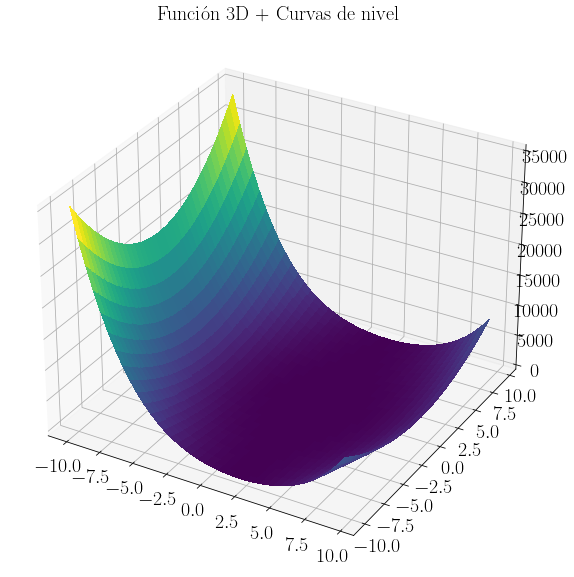

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

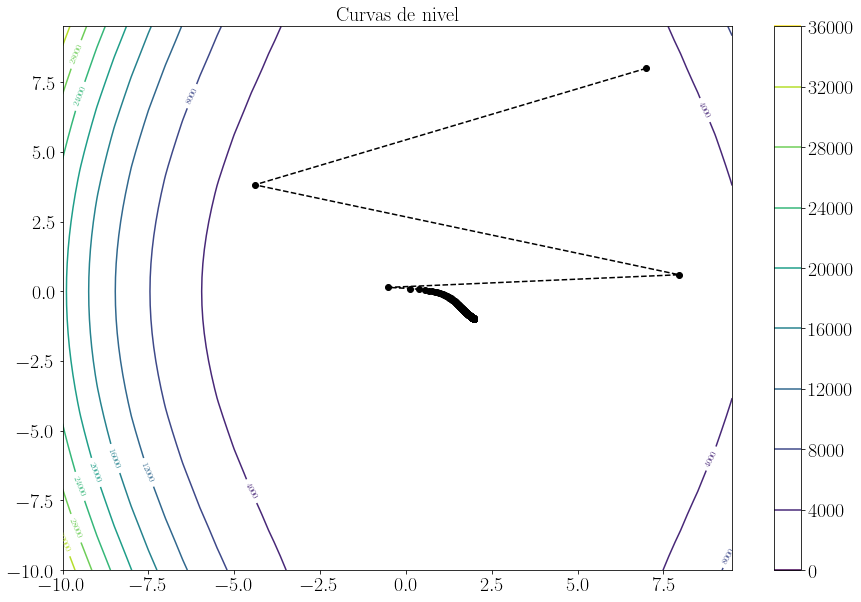

In [6]:
plt.figure(figsize=(15,10))
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

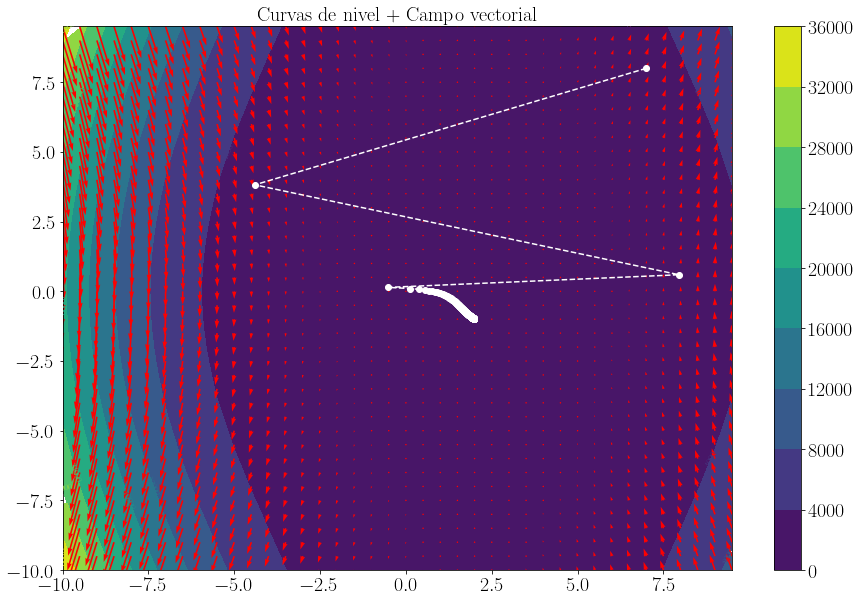

In [7]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

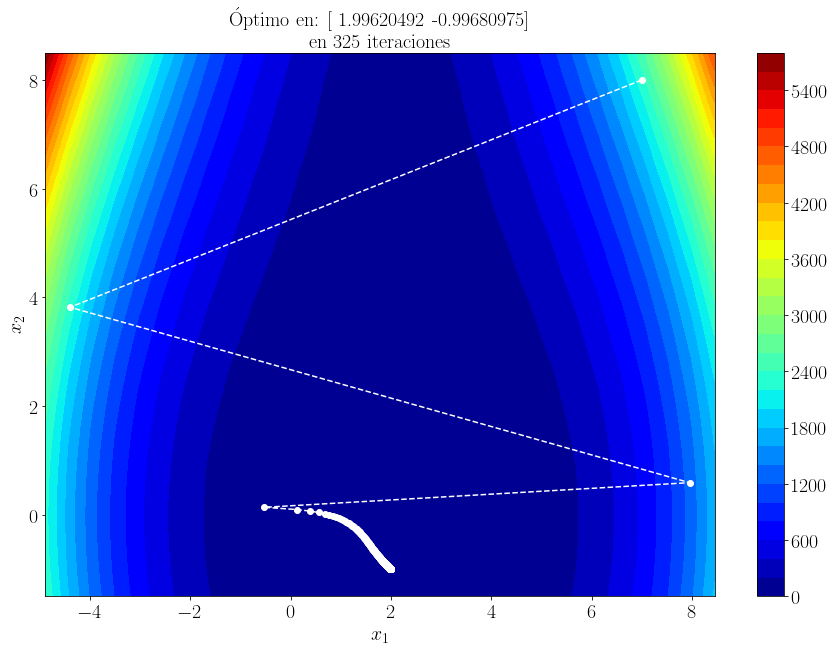

In [8]:
x1 = np.linspace(min(xk[:,0]-0.5),max(xk[:,0]+0.5),30)
x2 = np.linspace(min(xk[:,1]-0.5),max(xk[:,1]+0.5),30)
X1,X2 = np.meshgrid(x1,x2)
Z = F(X1,X2)

plt.figure(figsize=(15,10))
plt.title('Óptimo en: '+str(xk[-1,:])+'\n en '+str(len(xk))+' iteraciones')
plt.contourf(X1,X2,Z,30,cmap='jet')
plt.colorbar()
plt.plot(xk[:,0],xk[:,1],'o--w')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

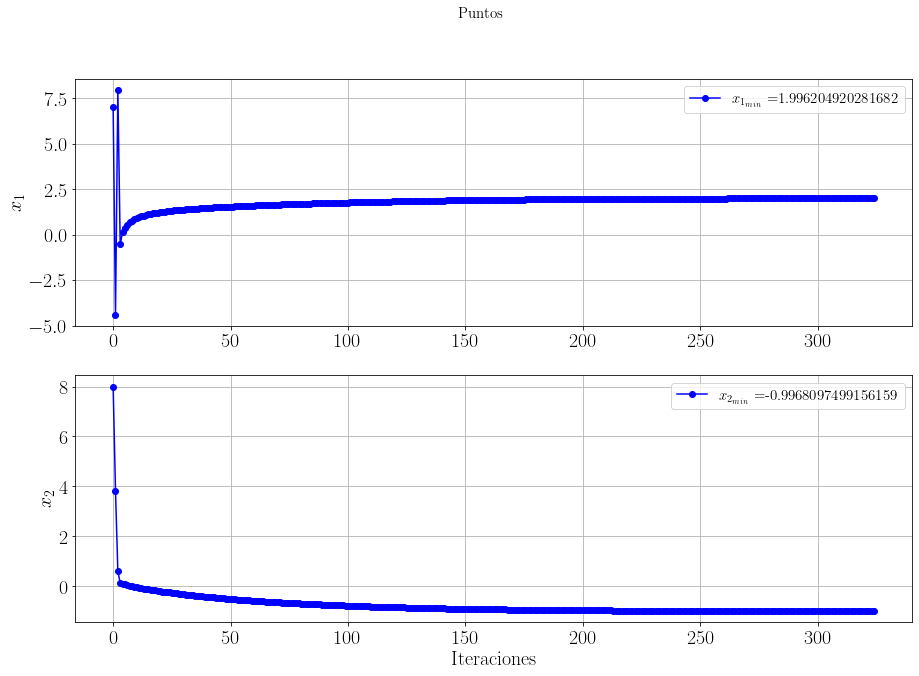

In [9]:
iterations = np.arange(0,len(xk))

fig, axs = plt.subplots(2, figsize = (15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso II. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de Quasi-Newton para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 10 & 0 \end{bmatrix}^{T}.
\end{equation}

In [10]:
x0 = np.array([10,0]) # Puntos iniciales

tol = 1e-2 # Tolerancia del algoritmo
eta = 1e-2
    
# Función objetivo
F = lambda x: np.power((x[0] + 2*x[1] - 7),2) + np.power((2*x[0] + x[1] - 5),2)
gradF = lambda x: np.array([8*x[1] + 10*x[0] - 34,10*x[1] + 8*x[0] - 38])

Fmin, xk = gradient_descent(x0, F, gradF, eta, tol)

## Graficación de resultados

In [11]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2:  (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

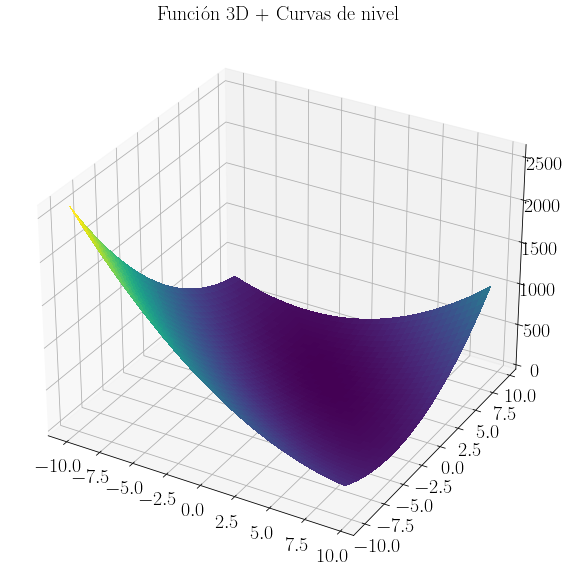

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

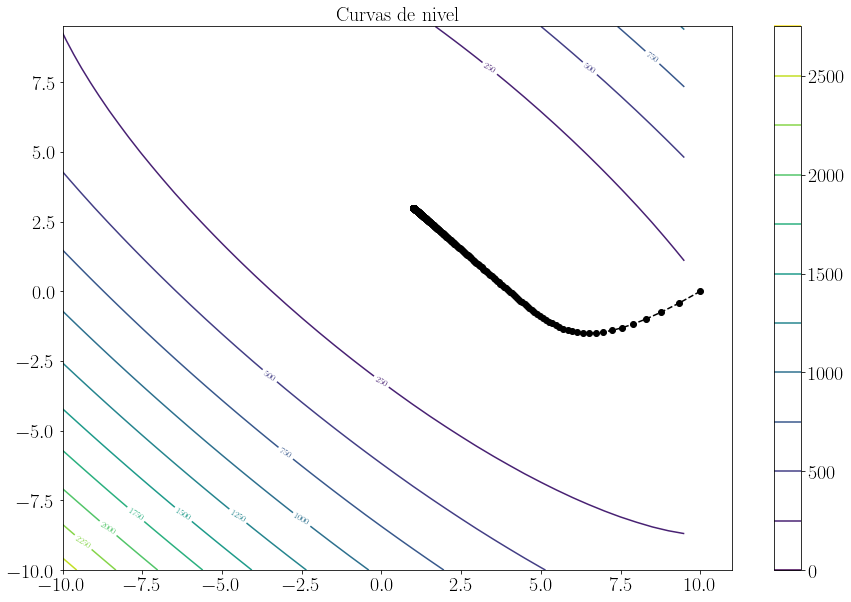

In [13]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

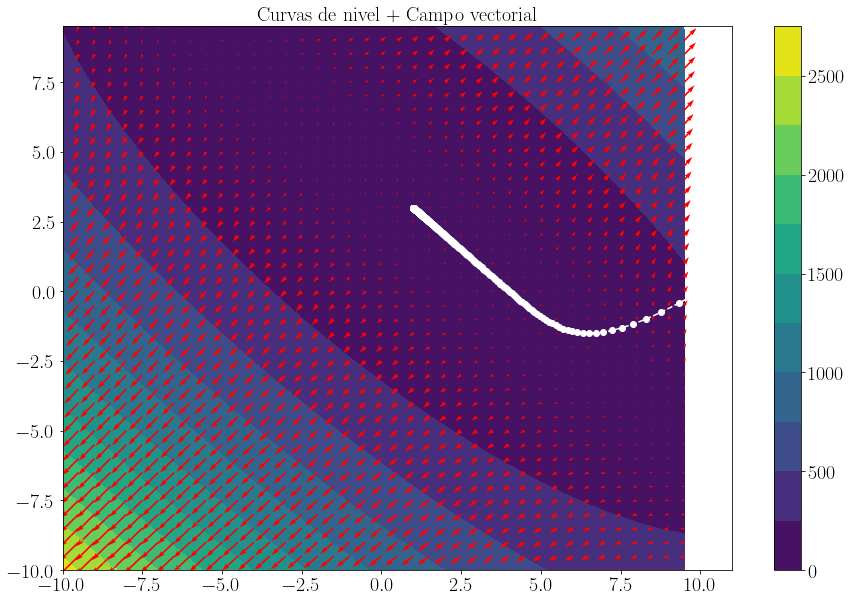

In [14]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

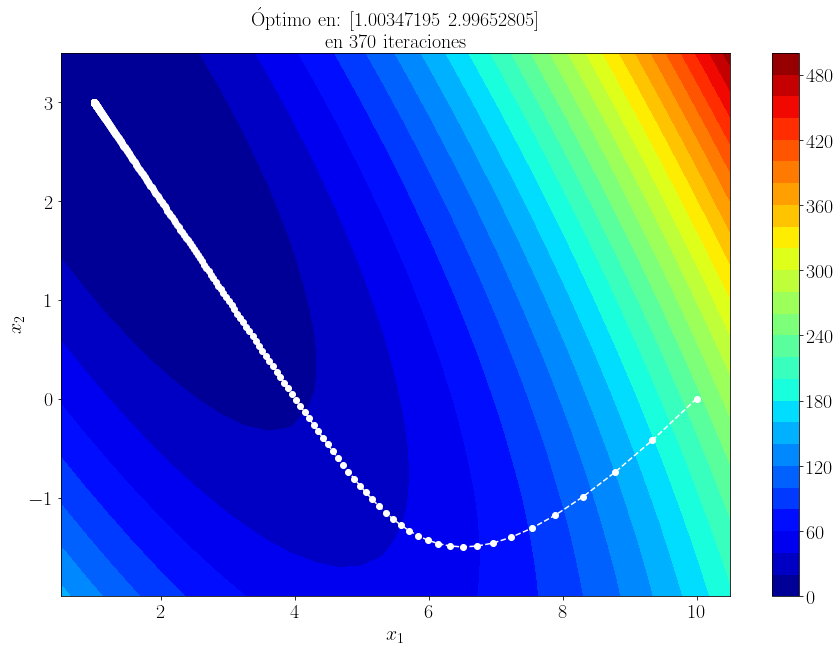

In [15]:
x1 = np.linspace(min(xk[:,0]-0.5),max(xk[:,0]+0.5),30)
x2 = np.linspace(min(xk[:,1]-0.5),max(xk[:,1]+0.5),30)
X1,X2 = np.meshgrid(x1,x2)
Z = F(X1,X2)

plt.figure(figsize=(15,10))
plt.title('Óptimo en: '+str(xk[-1,:])+'\n en '+str(len(xk))+' iteraciones')
plt.contourf(X1,X2,Z,30,cmap='jet')
plt.colorbar()
plt.plot(xk[:,0],xk[:,1],'o--w')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

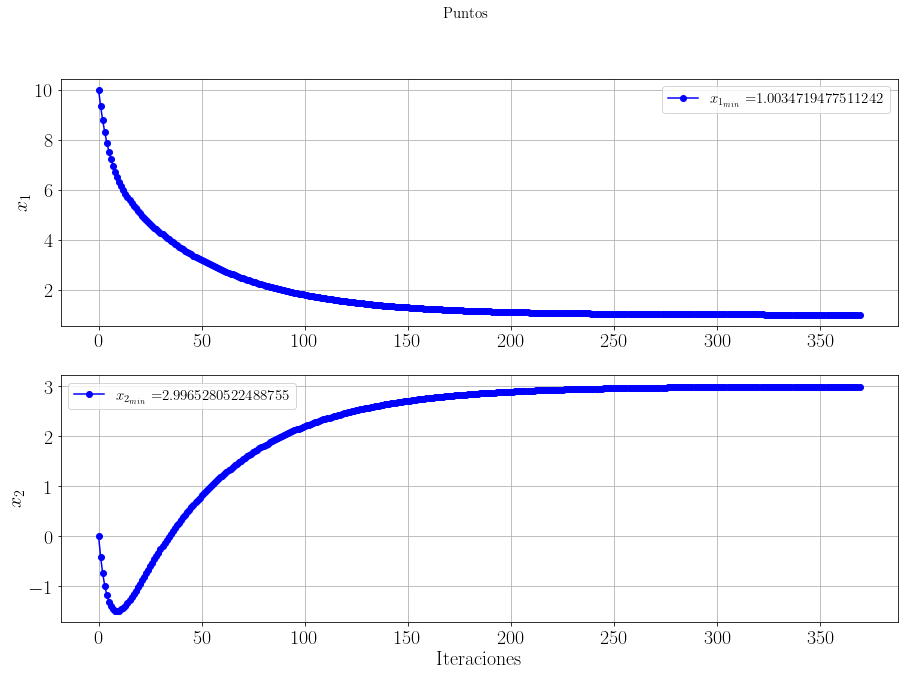

In [16]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso III. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de Quasi-Newton para minimizar la función de Matyas considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 5 & -5 \end{bmatrix}^{T}.
\end{equation}

In [17]:
x0 = np.array([5,-5]) # Puntos iniciales
    
tol = 1e-2 # Tolerancia del algoritmo
eta = 1e-2
    
# Función objetivo
F = lambda x: 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]
gradF = lambda x: np.array([-(12*x[1]-13*x[0])/25,
                                                           (13*x[1]-12*x[0])/25])

Fmin, xk = gradient_descent(x0, F, gradF, eta, tol)

## Graficación de resultados

In [18]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

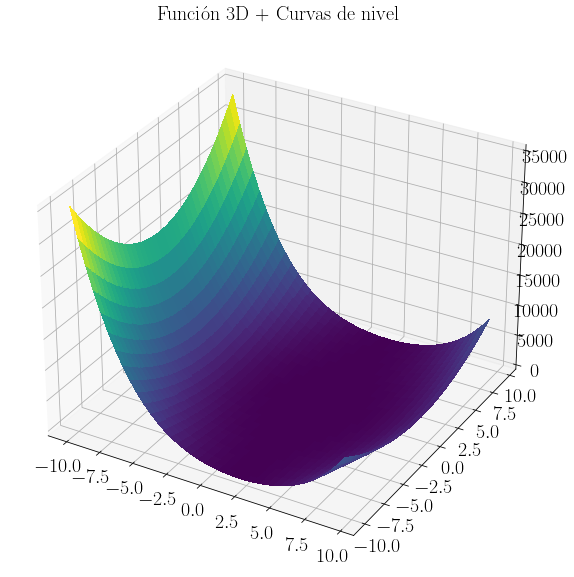

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

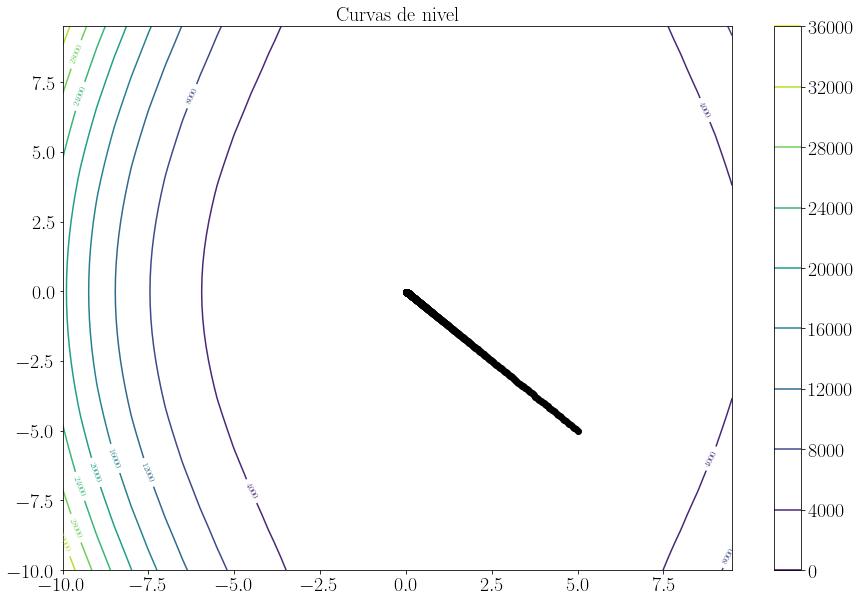

In [20]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

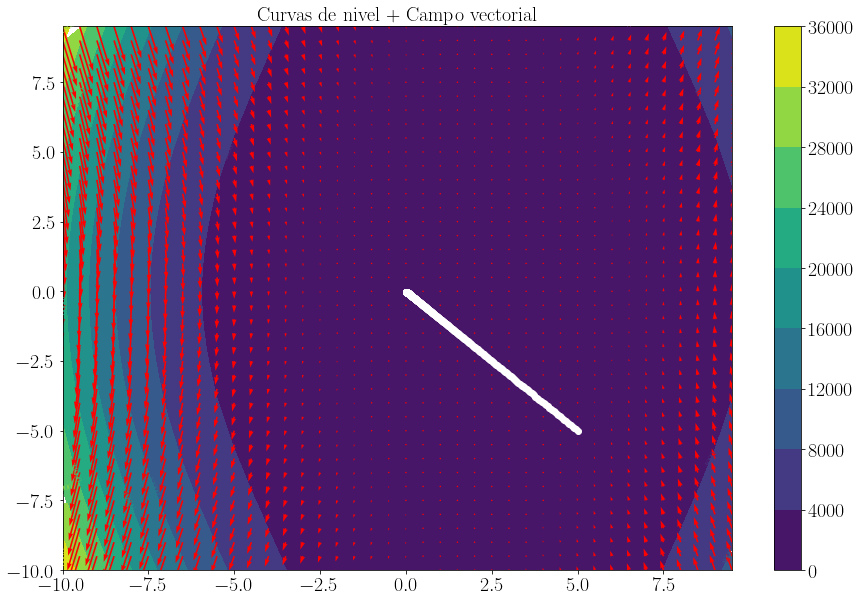

In [21]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

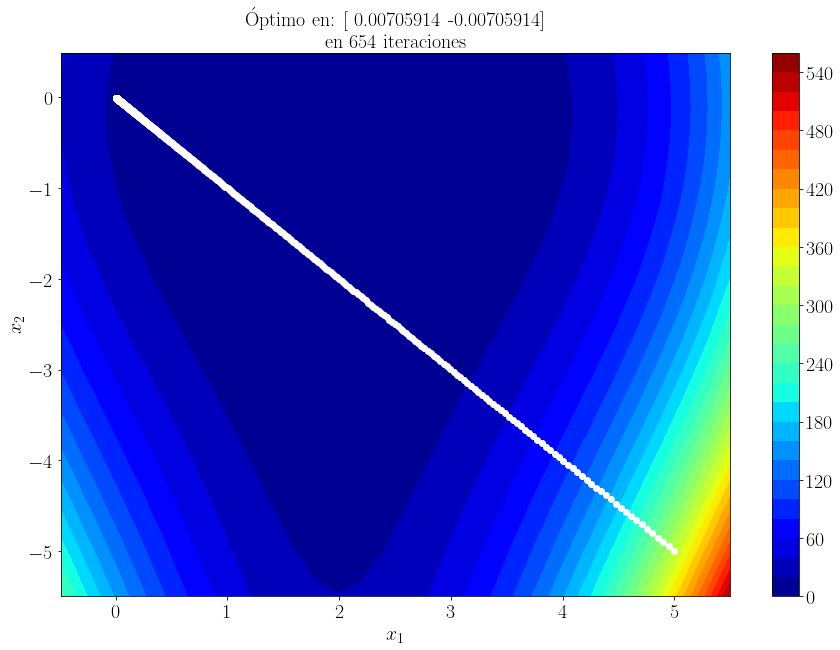

In [22]:
x1 = np.linspace(min(xk[:,0]-0.5),max(xk[:,0]+0.5),30)
x2 = np.linspace(min(xk[:,1]-0.5),max(xk[:,1]+0.5),30)
X1,X2 = np.meshgrid(x1,x2)
Z = F(X1,X2)

plt.figure(figsize=(15,10))
plt.title('Óptimo en: '+str(xk[-1,:])+'\n en '+str(len(xk))+' iteraciones')
plt.contourf(X1,X2,Z,30,cmap='jet')
plt.colorbar()
plt.plot(xk[:,0],xk[:,1],'o--w')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

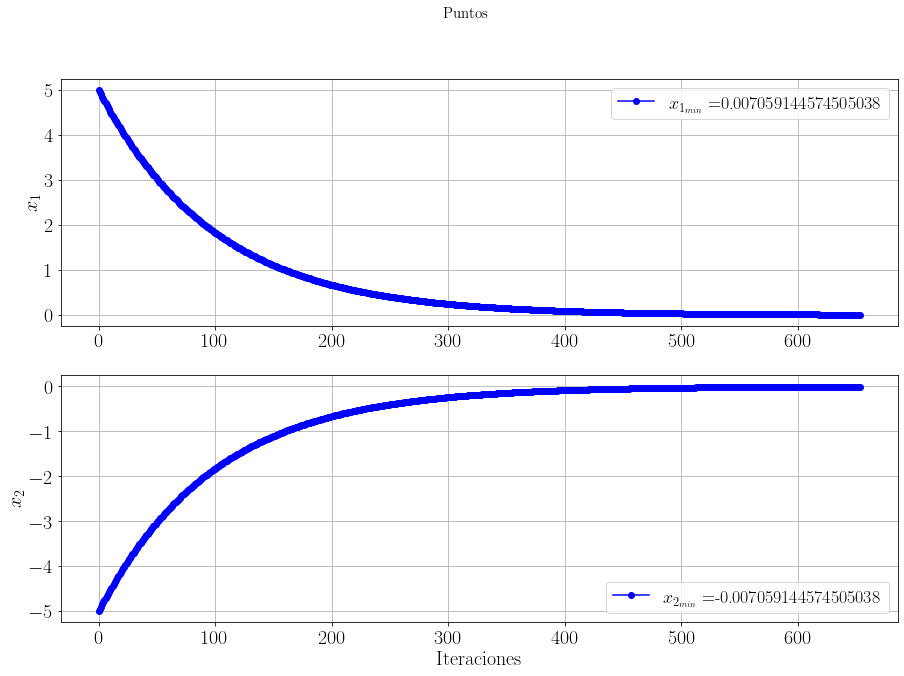

In [23]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Caso IV. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de GD para minimizar la función de Beale considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} -3 & 3 \end{bmatrix}^{T}.
\end{equation}

# Caso V. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1}^2+x_{2}-11\right)^2 + \left(x_{1} + x_{2}^2-7\right)^2,
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de GD.

In [24]:
x0 = np.array([-5,5]) # Puntos iniciales
    
tol = 1e-2 # Tolerancia del algoritmo
eta = 1e-3
    
# Función objetivo
F = lambda x: (x[0]**2+x[1]-11)**2 + (x[0] + x[1]**2-7)**2
gradF = lambda x: np.array([2*x[1]**2+4*x[0]*x[1]+4*x[0]**3-42*x[0]-14,
                                                         4*x[1]**3+(4*x[0]-26)*x[1]+2*x[0]**2-22])

Fmin, xk = gradient_descent(x0, F, gradF, eta, tol)

## Graficación de resultados

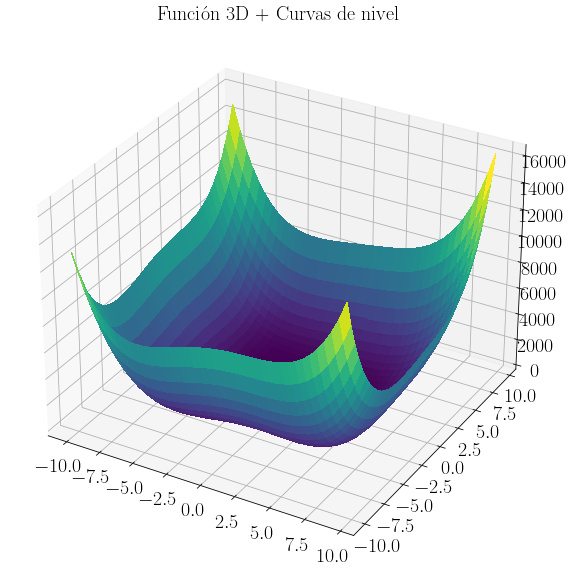

In [25]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1**2+x2-11)**2 + (x1 + x2**2-7)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

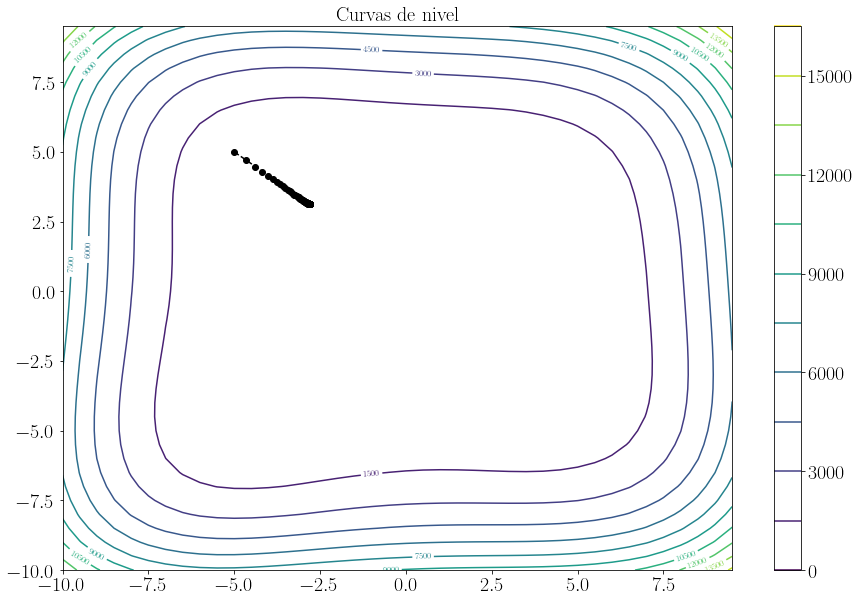

In [26]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

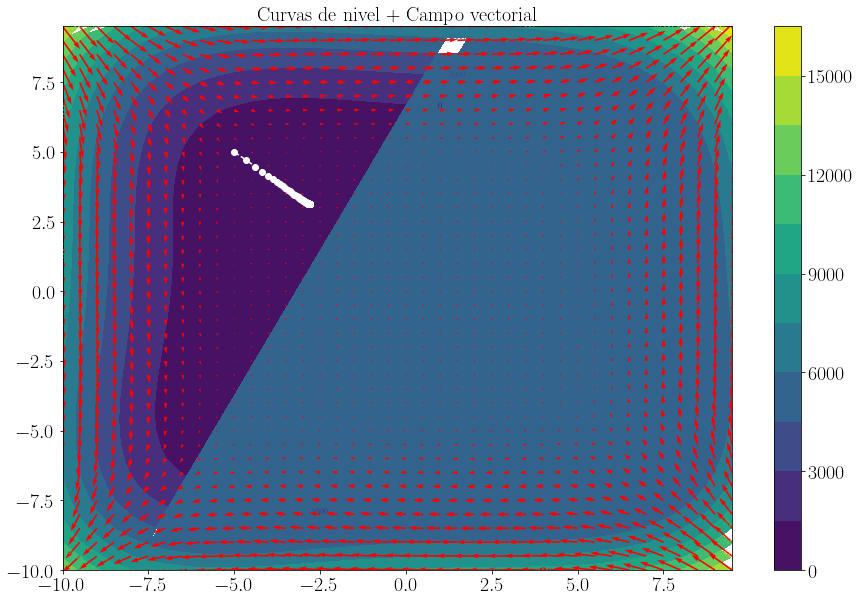

In [27]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

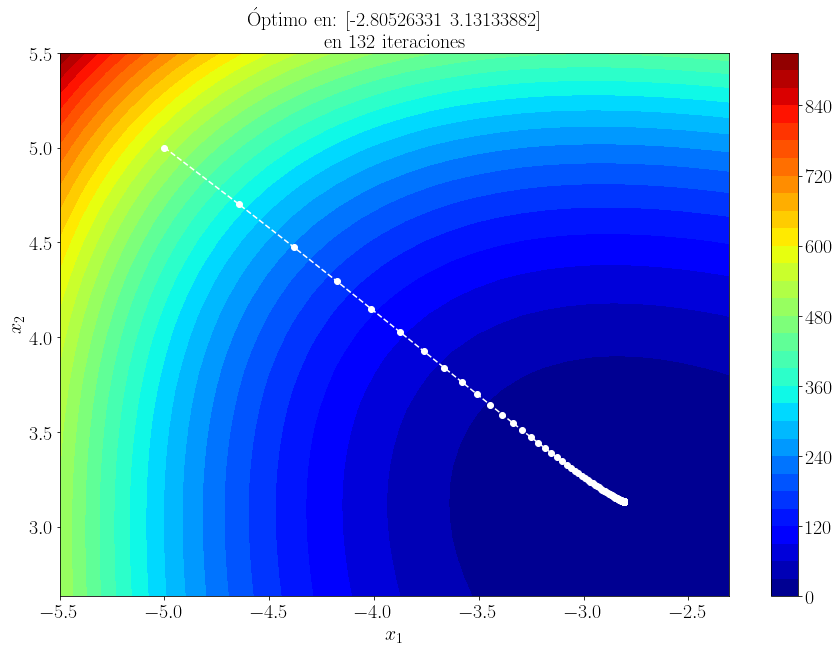

In [28]:
x1 = np.linspace(min(xk[:,0]-0.5),max(xk[:,0]+0.5),30)
x2 = np.linspace(min(xk[:,1]-0.5),max(xk[:,1]+0.5),30)
X1,X2 = np.meshgrid(x1,x2)
Z = F(X1,X2)

plt.figure(figsize=(15,10))
plt.title('Óptimo en: '+str(xk[-1,:])+'\n en '+str(len(xk))+' iteraciones')
plt.contourf(X1,X2,Z,30,cmap='jet')
plt.colorbar()
plt.plot(xk[:,0],xk[:,1],'o--w')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

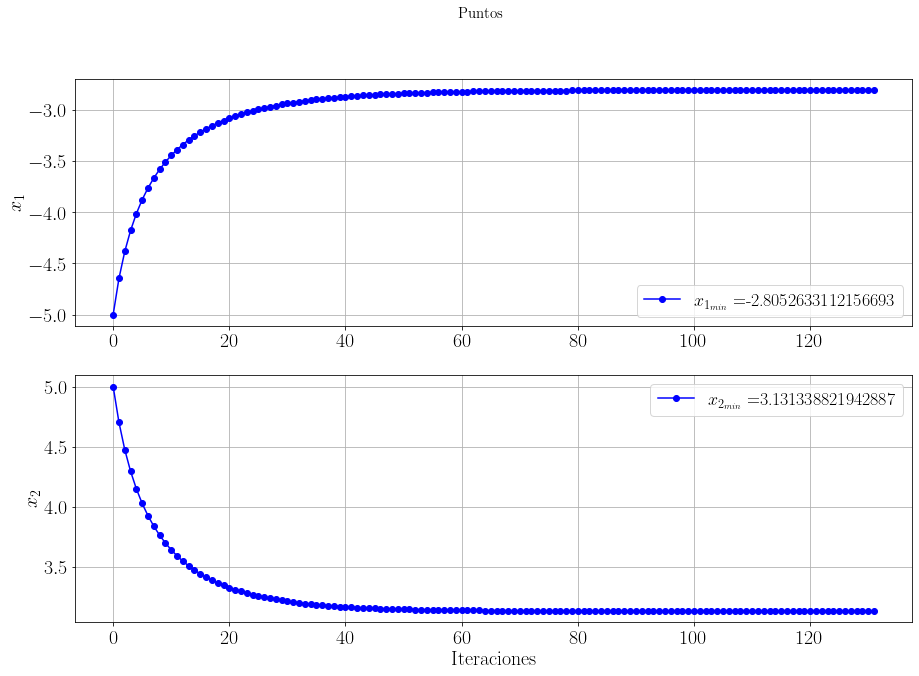

In [29]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Referencias
[1] Cauchy, A. (1847). Méthode générale pour la résolution des systemes d’équations simultanées. *Comp. Rend. Sci. Paris*, 25(1847), 536-538.

[2] Ernesto, R. W., Ernesto, L. G., Rafael, B., & Yolanda, G. G. (2016). Perfiles de comportamiento numérico de los métodos de búsqueda immune network algorithm y bacterial foraging optimization algorithm en funciones benchmark. *Ingeniería, investigación y tecnología*, 17(4), 479-490.

